## 0) Loading Data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor


data = pd.read_csv("winequality-red.csv", sep=";")

X = data.drop("quality", axis=1)
y = data["quality"]

## Exercise 1

/home/joselopes/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joselopes/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joselopes/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joselopes/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joselopes/.local/lib/python3.1

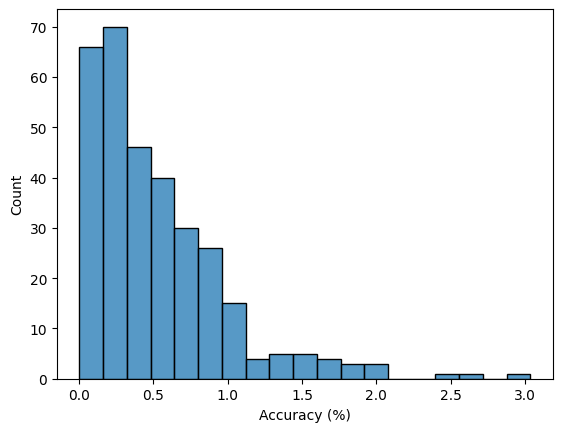

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

regressor_scores = []
for i in range(1, 11):
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", early_stopping=True, validation_fraction=0.2, random_state=i)
    mlp_regressor.fit(X_train, y_train)
    regressor_scores.append(mlp_regressor.predict(X_test))

regressor_scores = np.mean(regressor_scores, axis=0)

residues = np.array(list(map(lambda x: abs(x), regressor_scores - y_test)))

sns.histplot(data=residues)
plt.xlabel("Residual difference")
plt.show()